### Plot diagnostic quantities

Uses the Unified Model's .pe0 files to plot diagnostic quantities on a per-timestep basis. Note that the UM's print level must be set to 'debug'.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
with open('/scratch/w40/dr4292/aus2200-instability-analysis/75sec/20220222T0000Z/aus2200_d0198_RA3_um_fcst_000/pe_output/umnsa.fort6.pe0000','r') as f:
    lines=[ i.strip() for i in f.readlines() ]

In [5]:
vals_avg=dict.fromkeys([l.split()[0] for l in lines if l.startswith('s_')])
vals_max=dict.fromkeys([l.split()[0] for l in lines if l.startswith('s_')])
vals_min=dict.fromkeys([l.split()[0] for l in lines if l.startswith('s_')])
for k in vals_avg:
    vals_avg[k]=[]
    vals_max[k]=[]
    vals_min[k]=[]
del(vals_avg['s_pdm'])
del(vals_min['s_pdm'])
del(vals_max['s_pdm'])

In [6]:
for l in lines:
    if l.startswith('s_'):
        l_arr=l.split()
        for k in vals_avg:
            if l_arr[0] == k:
                vals_min[k].append(float(l_arr[2]))
                vals_max[k].append(float(l_arr[3]))
                vals_avg[k].append(float(l_arr[4]))

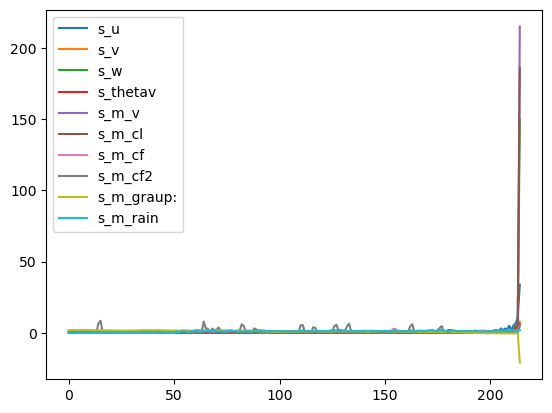

In [14]:
fig,ax=plt.subplots()
x=[ i for i,_ in enumerate(vals_min['s_u']) ]
for k,v in vals_max.items():
    ax.plot(x,v/np.average(v),label=k)
ax.legend()

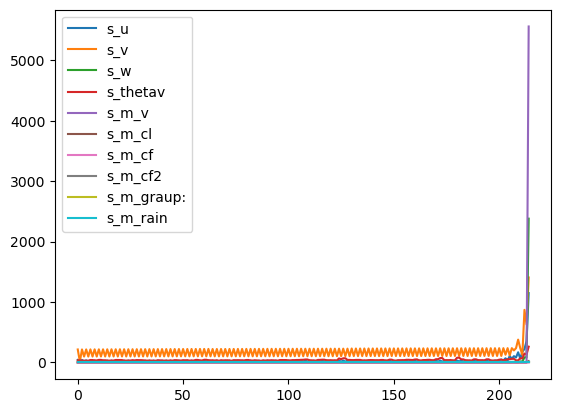

In [15]:
fig,ax=plt.subplots()
for k,v in vals_max.items():
    ax.plot(x,v,label=k)
ax.legend()